In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet('fixtypes.parquet')
print(df.dtypes)

Row ID                    int64
Order ID         string[python]
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode        string[python]
Customer ID      string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Postal Code               int64
Region           string[python]
Product ID       string[python]
Category         string[python]
Sub-Category     string[python]
Product Name     string[python]
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


# Profit / Loss of each State

In [3]:
typecheck = "State"

Profit = df[[typecheck, 'Profit']]
Profit = Profit.groupby([typecheck]).sum()

loss = Profit[Profit['Profit'] < 0].sort_values('Profit')

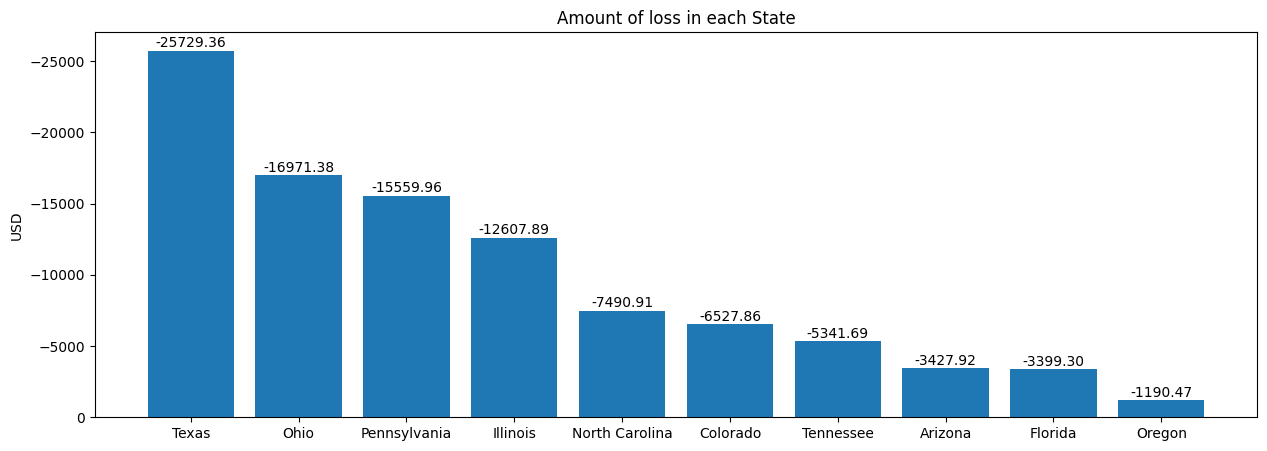

List of State Profit less than 0 :
                    Profit
State                     
Texas          -25729.3563
Ohio           -16971.3766
Pennsylvania   -15559.9603
Illinois       -12607.8870
North Carolina  -7490.9122
Colorado        -6527.8579
Tennessee       -5341.6936
Arizona         -3427.9246
Florida         -3399.3017
Oregon          -1190.4705


In [4]:
x_axis = loss.index.to_list()
y_axis = loss['Profit'].to_list()

#table
plt.figure(figsize=(15,5))
table = plt.bar(x_axis, y_axis)

fig_width_in, fig_height_in = plt.gcf().get_size_inches()

for bar in table:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h-(fig_height_in*plt.gcf().dpi * 2),
        f'{h:.2f}',
        ha='center',
        va = 'top'
    )

plt.gca().invert_yaxis()
plt.title(f'Amount of loss in each {typecheck}')
plt.ylabel('USD')
plt.show()

print(f"List of State Profit less than 0 :\n{loss}")

### amount of loss in each city of each state

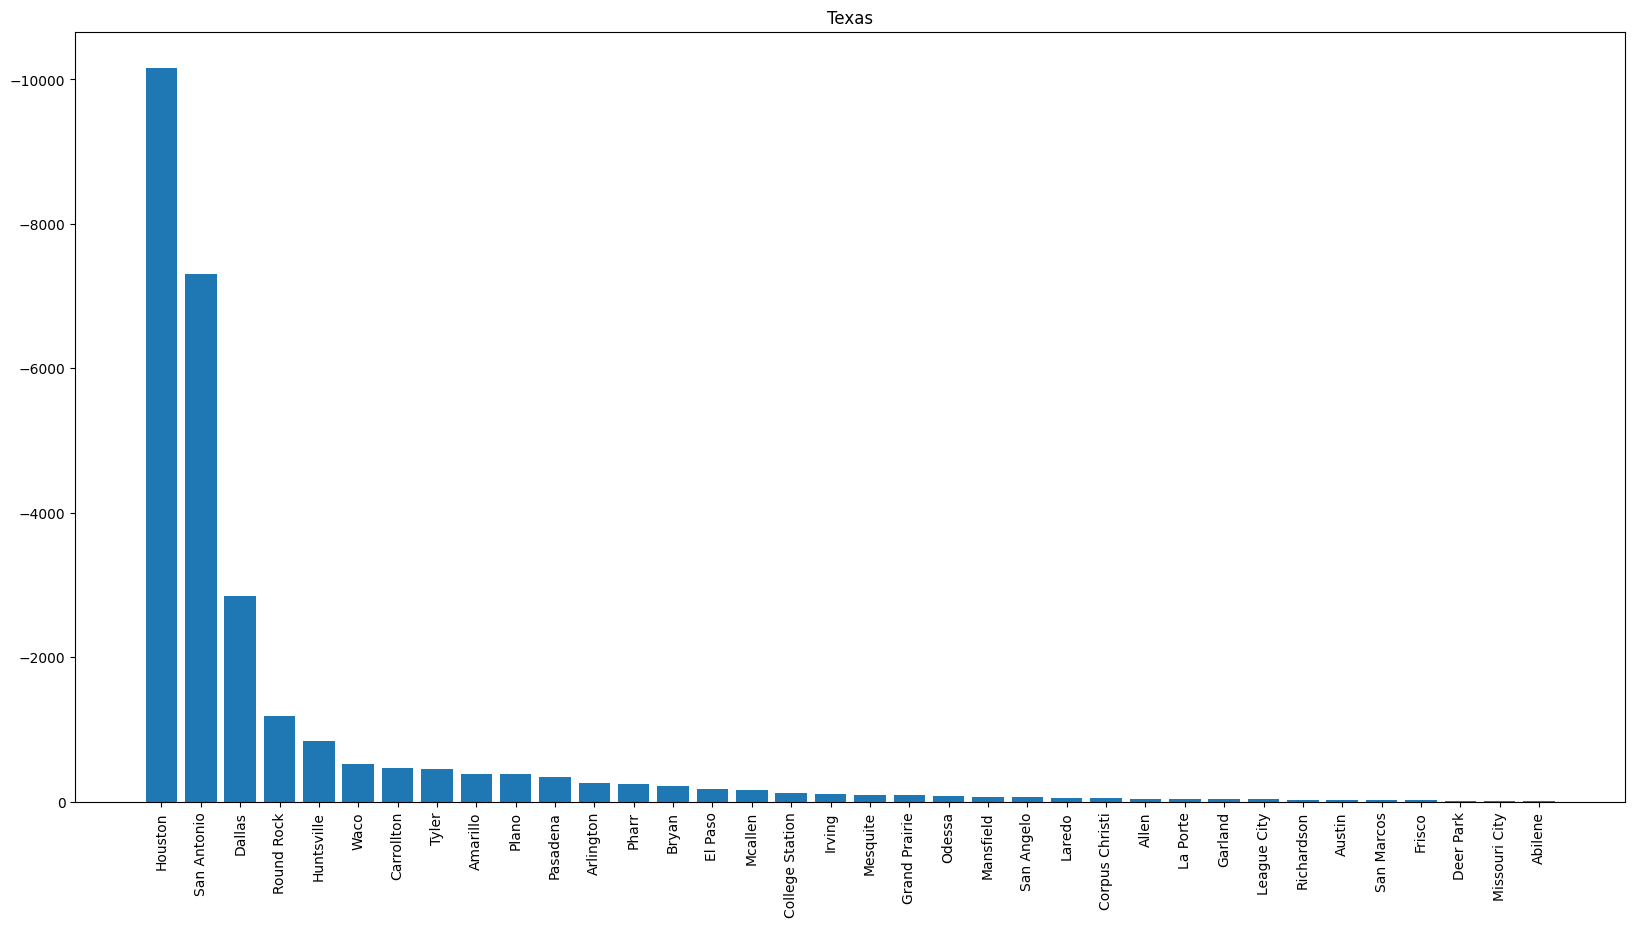

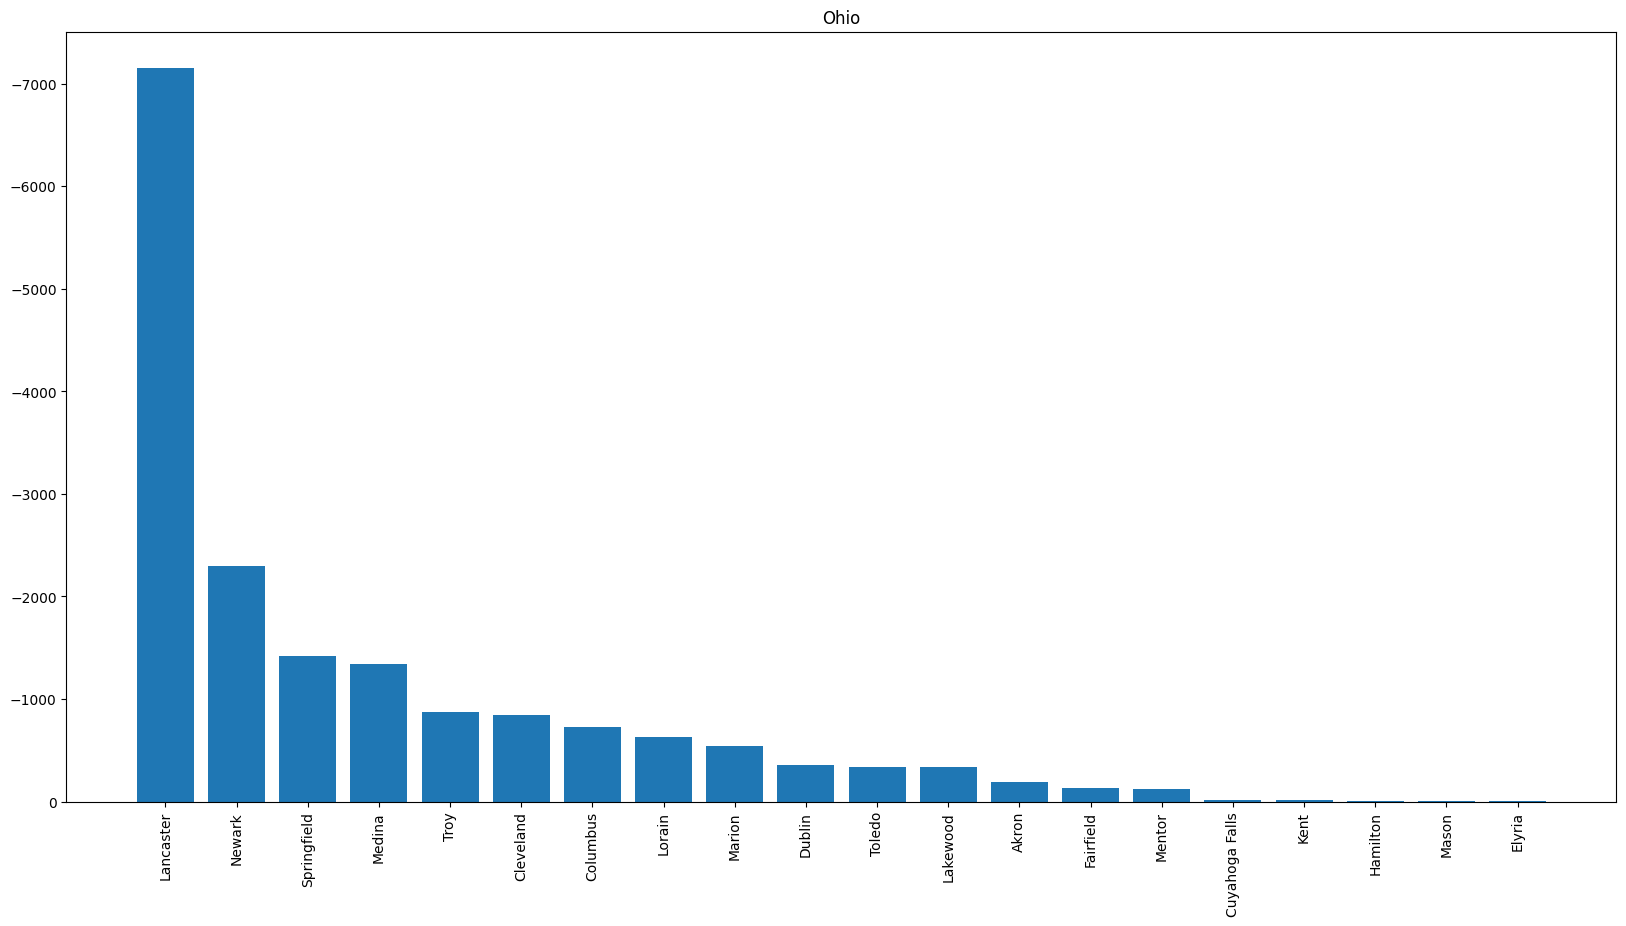

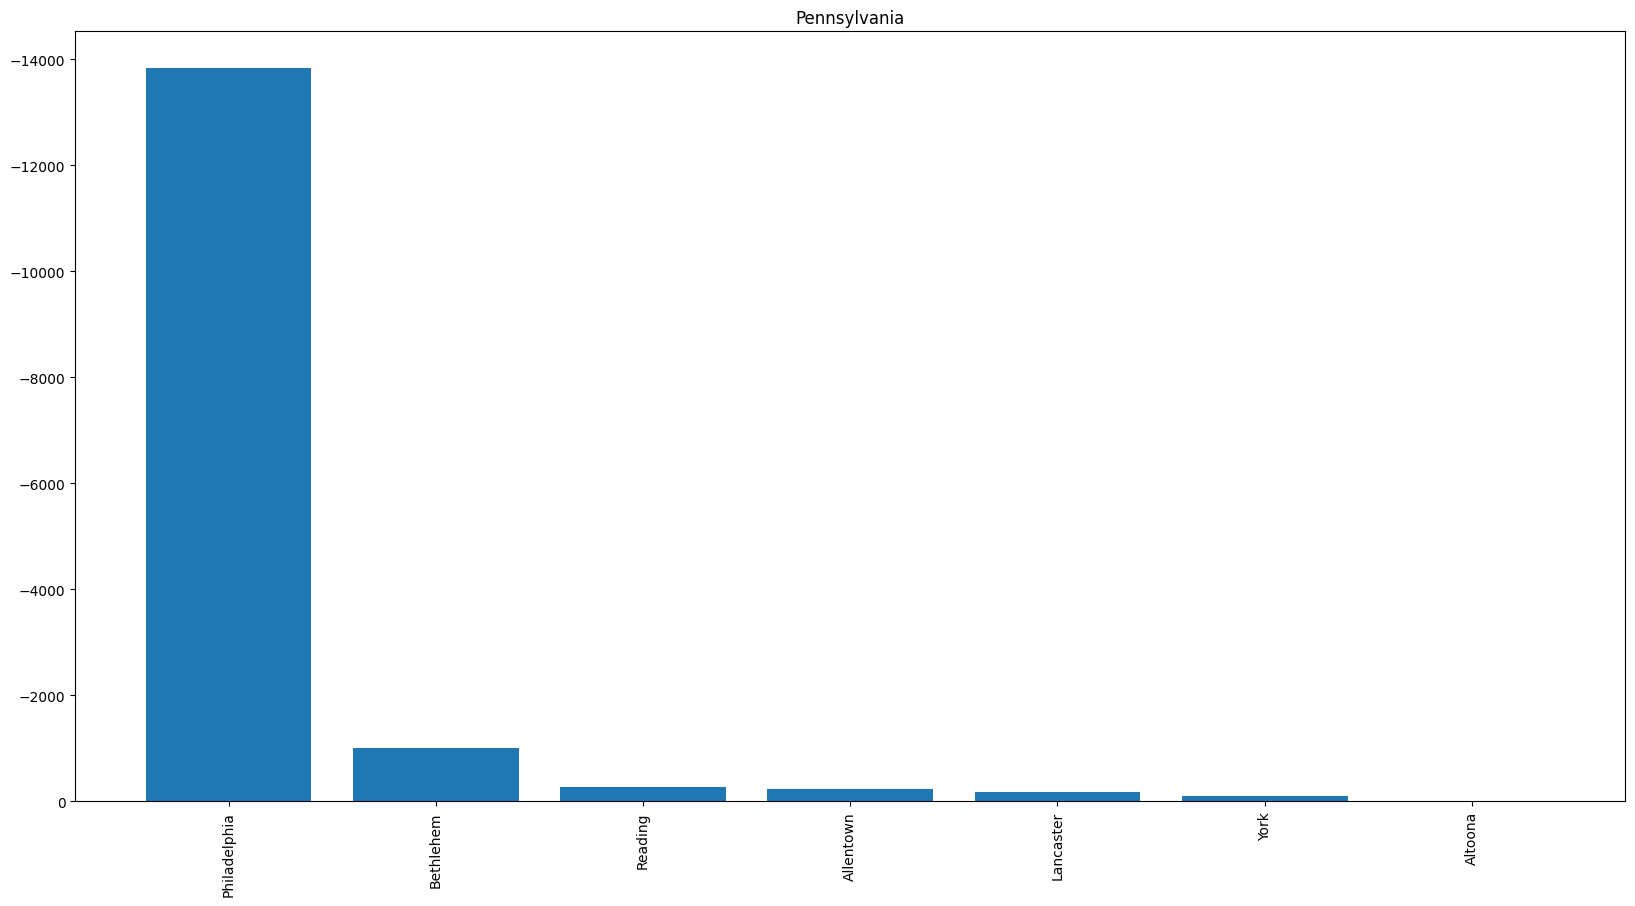

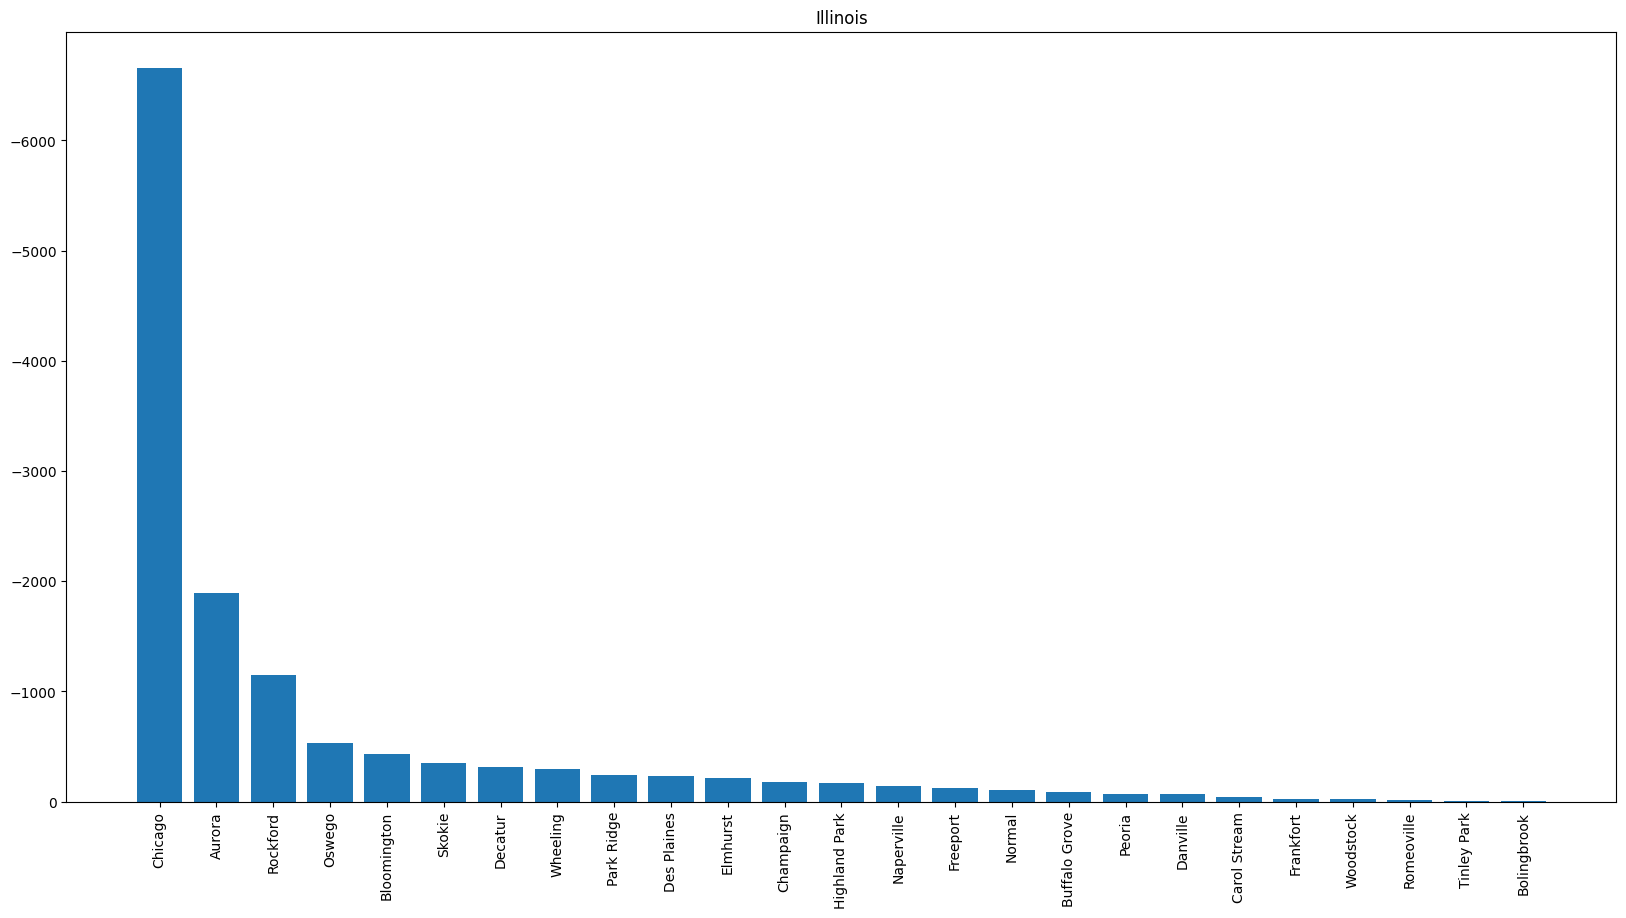

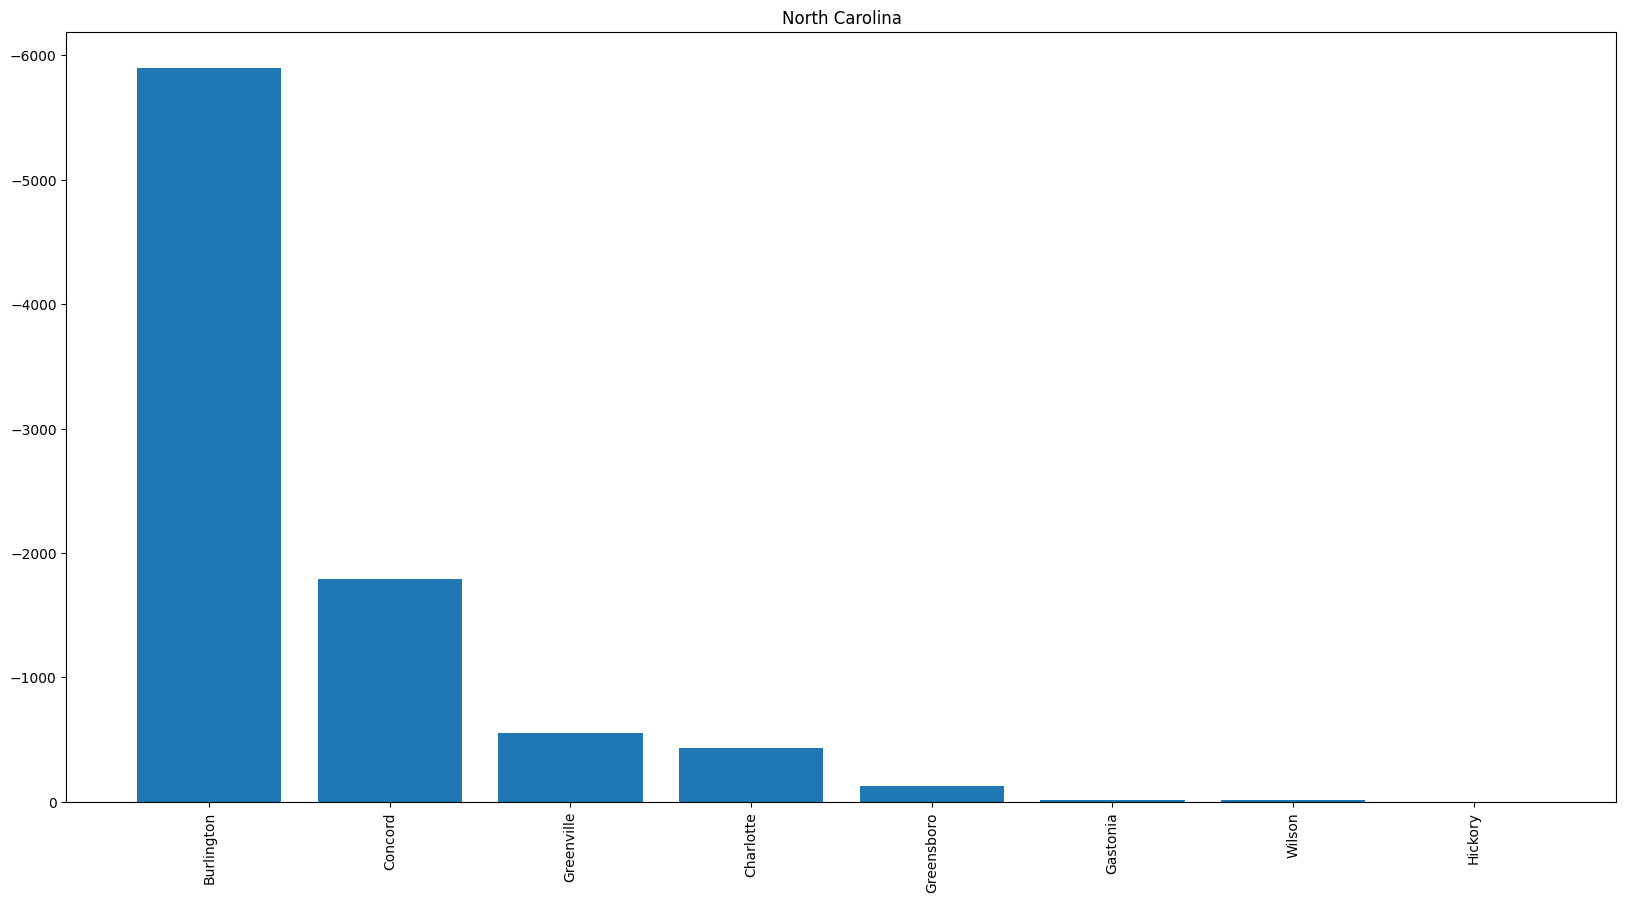

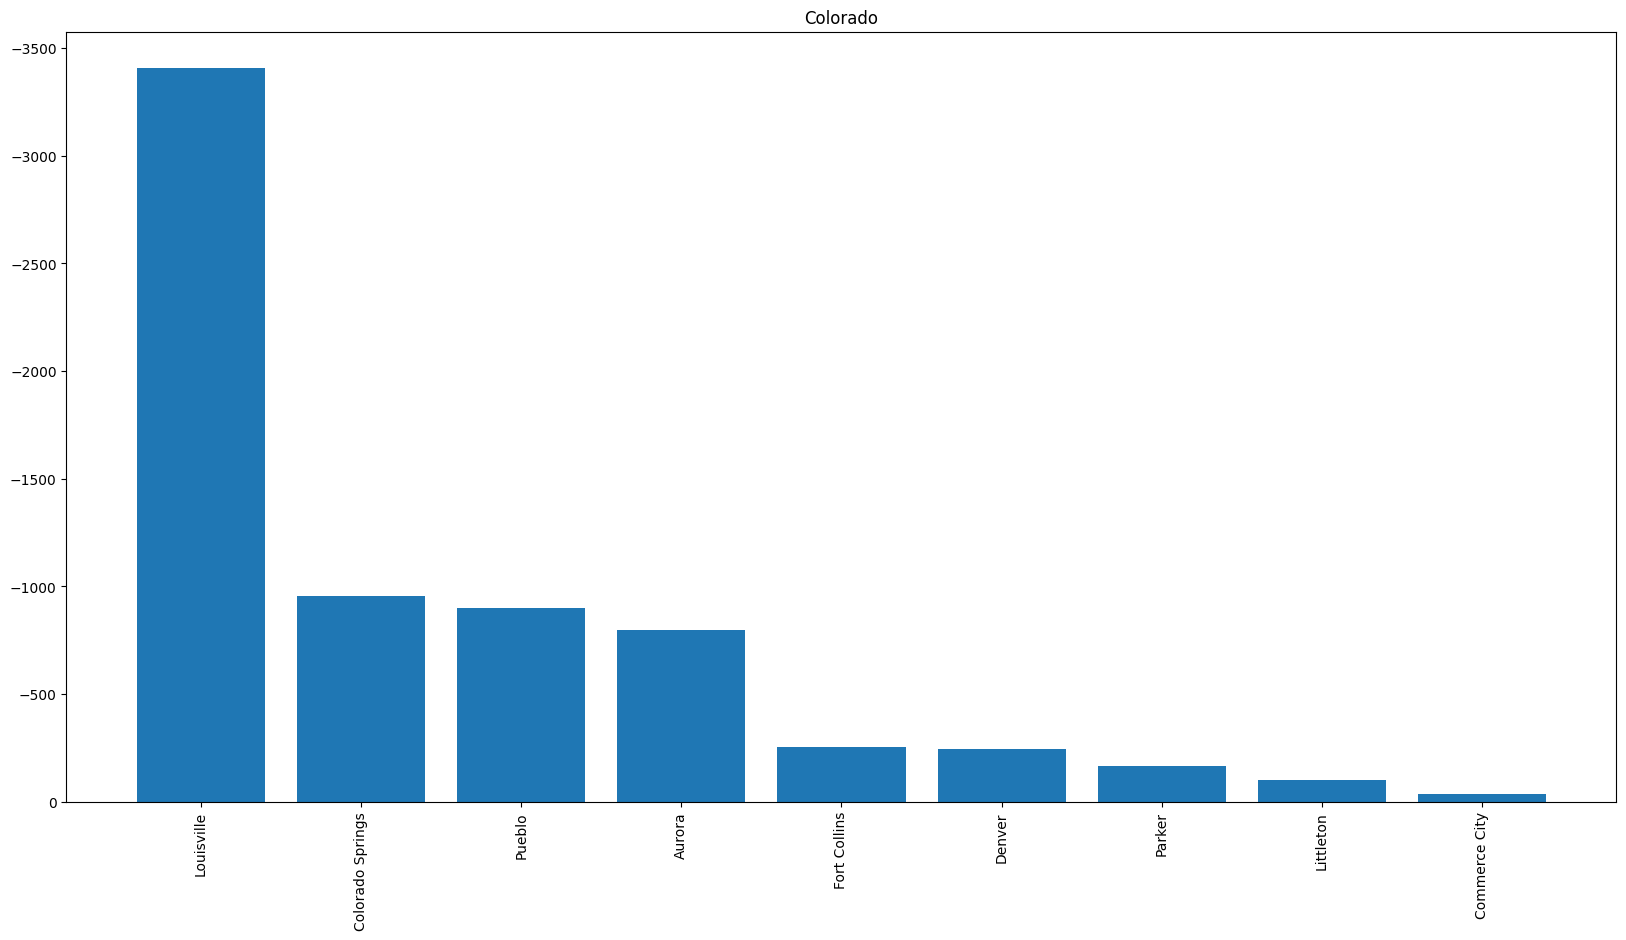

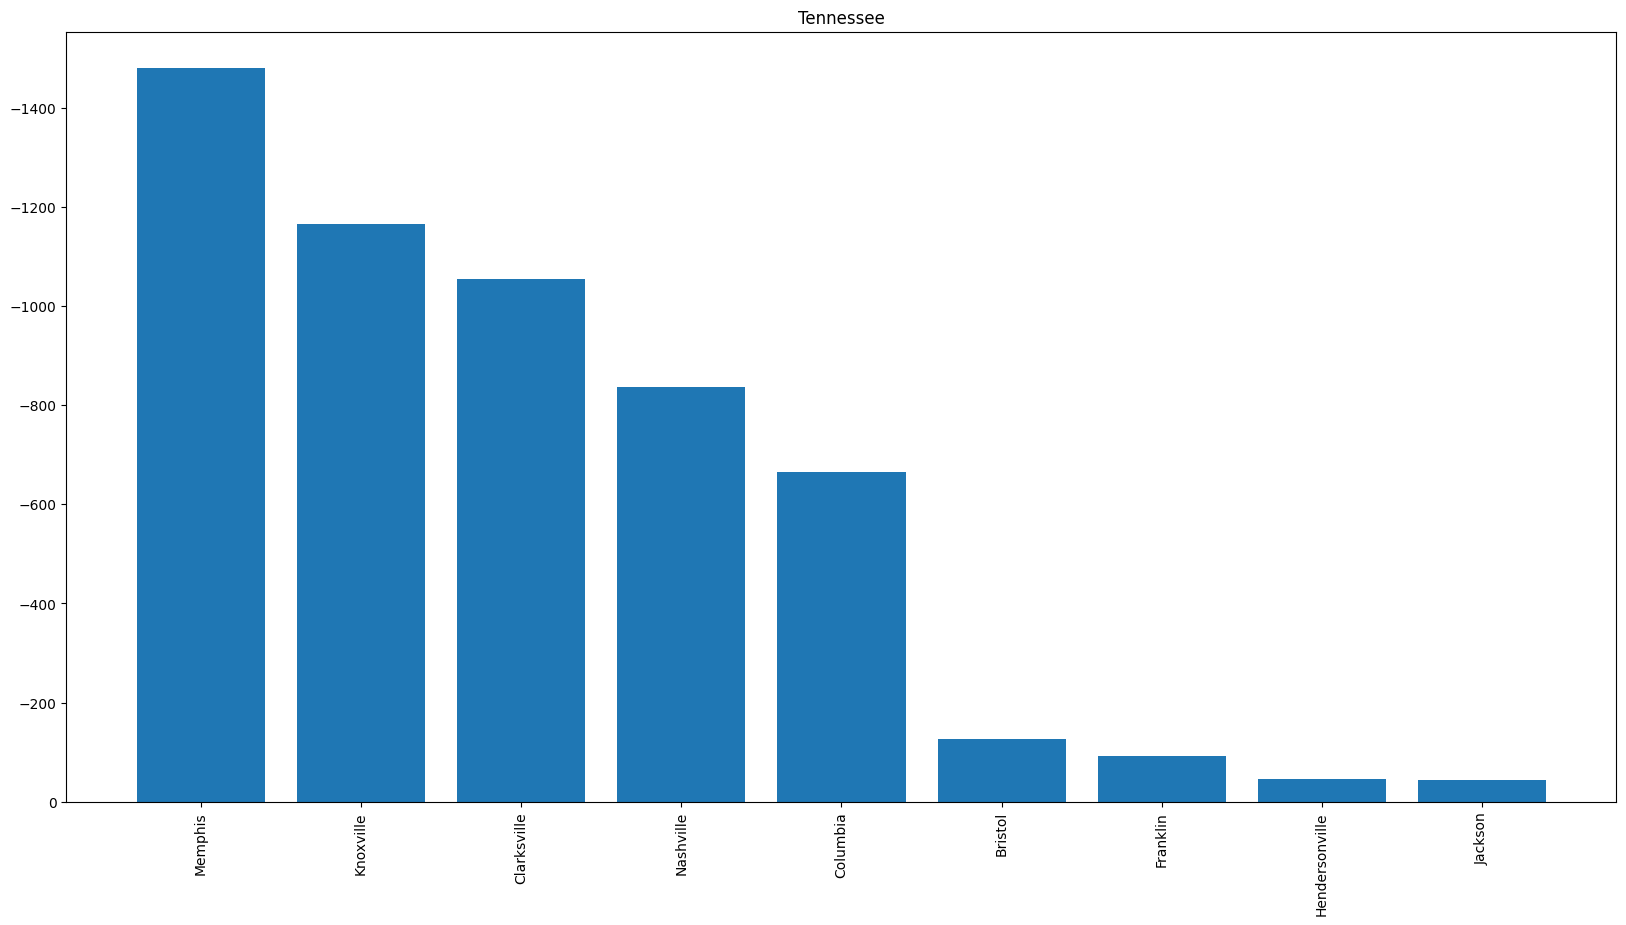

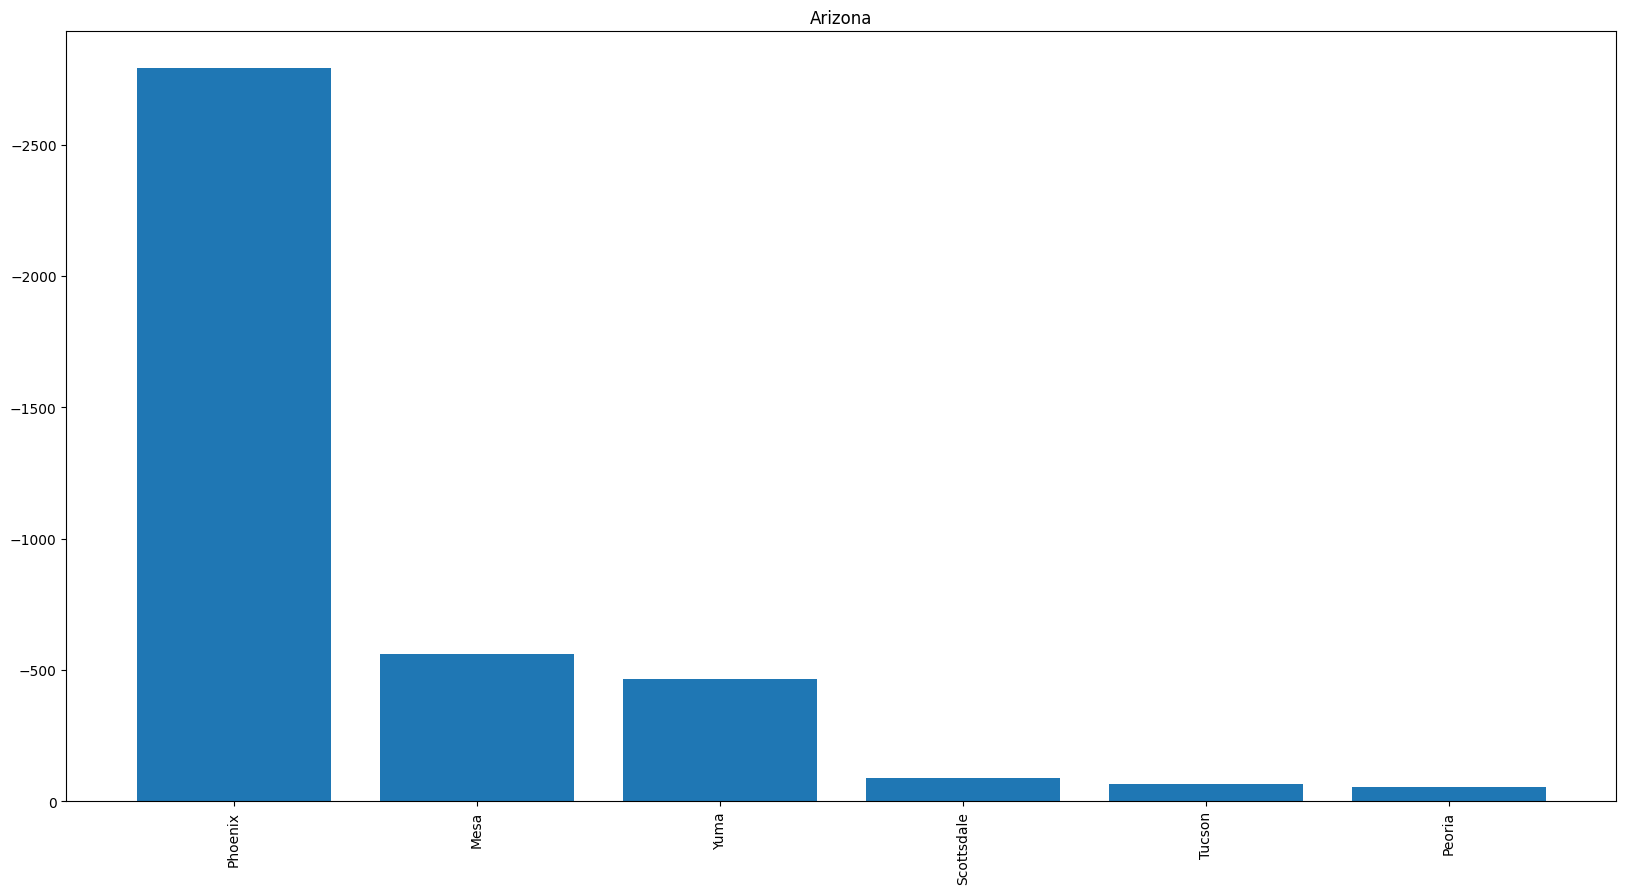

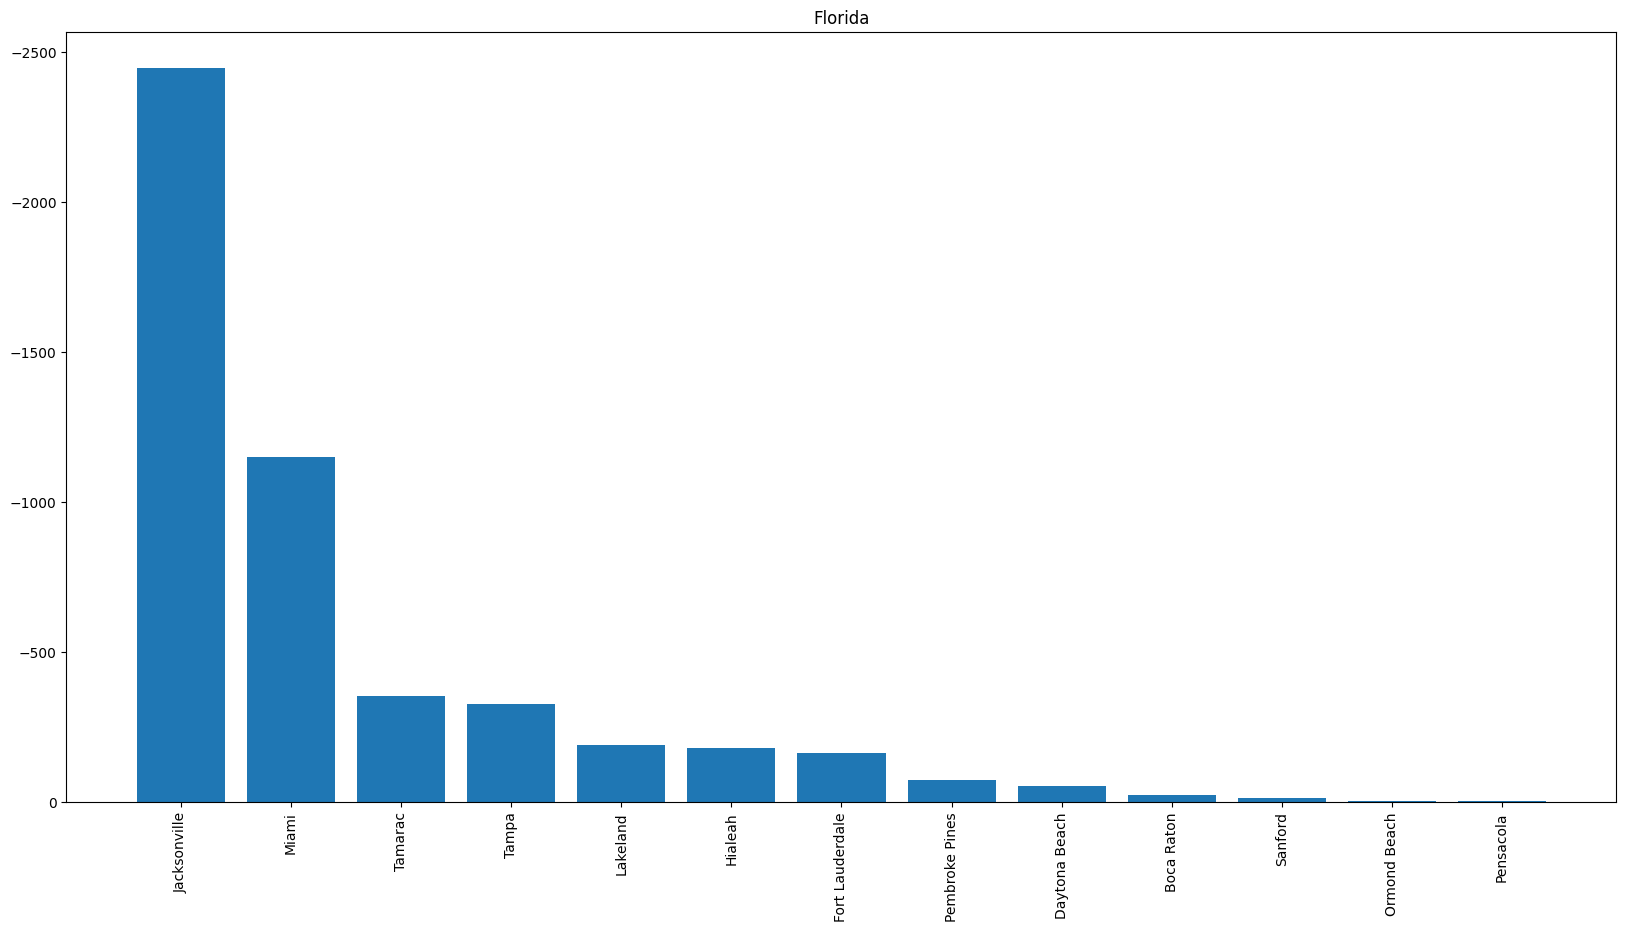

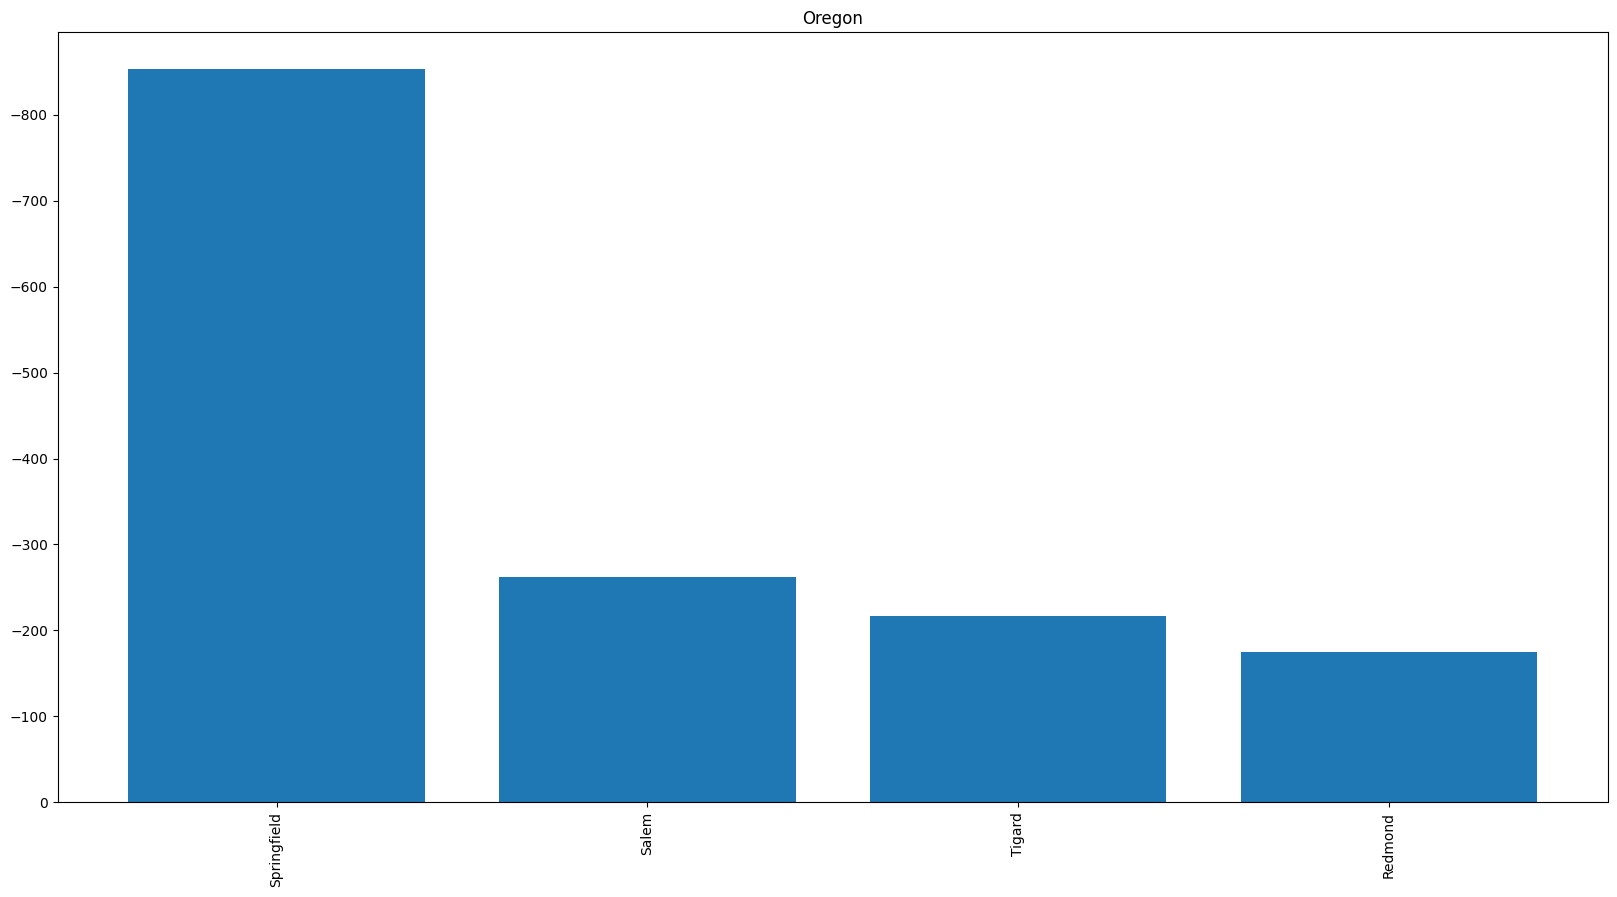

In [5]:
loss_States = loss.index.to_list()

for State in loss_States:
    group_city = df[df['State'] == State][['City', 'Profit']]
    group_city = group_city.groupby(['City']).sum()
    group_city = group_city[group_city['Profit'] < 0].sort_values('Profit')

    plt.figure(figsize=(20,10))

    plt.bar(group_city.index.to_list(), group_city['Profit'].to_list())
    plt.title(State)
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    plt.show()

